In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

from wire_analysis.beamshape import (integrate_H_angles_1D, calc_norm_factor,
                                     # integrate_H_angles,
                                     H_profile
                                     )
from wire_analysis.beamshape import  (integrate_H_angles 
                                      as integrate_H_angles_old)

#plot Options
import matplotlib as mpl
font = {#'family' : 'normal','weight' : 'bold',
        'size'   : 16
        #,'serif':['Helvetica']
        }
mpl.rc('font', **font)

degree = np.pi/180

In [63]:
integrate_H_angles_1D(l_eff = 4,theta_max = 20*degree )*calc_norm_factor(
    l_eff = 4)

0.2545042605970515

In [64]:
integrate_H_angles_1D(l_eff = 100,theta_max = 20*degree )*calc_norm_factor(
    l_eff = 100)

0.2925189701852399

In [65]:
integrate_H_angles_1D(l_eff = 1000,theta_max = 20*degree )*calc_norm_factor(
    l_eff = 1000)

0.29382070153589757

Shit, it doesn't look like the limit is 1

In [66]:
theta_lim = [0,np.pi/2]
integrate_H_angles_1D(l_eff = 1000,theta_lim = [0,20*degree] )*calc_norm_factor(
                        l_eff = 1000)

0.2938207063632363

In [67]:
integrate_H_angles_1D(l_eff = 1000,theta_lim = [0,20*degree] )

0.0010763709492059219

In [68]:
def integrate_H_angles(theta_lim = [0,np.pi/2], l_eff = 7.96, y0 = 35.17,
                       theta_max = 90 * degree, norm_factor = 1):
    integrant = lambda theta, phi: (norm_factor
                        * H_profile(theta, l_eff, theta_max) 
                             #* np.sin(theta)
                        )
    result, err = integrate.dblquad(integrant,
                                0,  2* np.pi, # phi_limits
                                theta_lim[0], theta_lim[1] # theta_lims
                                )
    return result

In [117]:
def integrate_H_angles_nosin_1D(theta_lim = [0,np.pi/2], l_eff = 7.96, y0 = 35.17,
                       theta_max = 90 * degree, norm_factor = 1):
    # Integral over phi  from [0, 2 * np.pi]
    integrant = lambda theta: (norm_factor * 2 * np.pi
                        * H_profile(theta, l_eff, theta_max) 
                             #* np.sin(theta)
                        )
    result, err = integrate.quad(integrant,
                                theta_lim[0], theta_lim[1] # theta_lims
                                )
    return result

In [69]:
def integrate_H_angles_cos(theta_lim = [0,np.pi/2], norm_factor = 1):
    integrant = lambda theta, phi: (norm_factor
                        * np.cos(theta)
                             * np.sin(theta)
                        )
    result, err = integrate.dblquad(integrant,
                                0,  2* np.pi, # phi_limits
                                theta_lim[0], theta_lim[1] # theta_lims
                                )
    return result

integrate_H_angles_cos(
    theta_lim = [0,90*degree] )

3.1415926535897927

In [70]:
integrate_H_angles(l_eff = 1000,theta_lim = [0,20*degree] )/integrate_H_angles(
    l_eff = 1000,theta_lim = [0,90*degree] )

0.833224747918568

In [71]:
integrate_H_angles(l_eff = 0.01,theta_lim = [0,20*degree] )/integrate_H_angles(
    l_eff = 0.01,theta_lim = [0,90*degree] )

0.3420550902571653

In [72]:
integrate_H_angles(l_eff = 1,theta_lim = [0,20*degree] )/integrate_H_angles(
    l_eff = 1,theta_lim = [0,90*degree] )

0.43106922503297723

In [73]:
integrate_H_angles(l_eff = 1e10,theta_lim = [0,20*degree] )/integrate_H_angles(
    l_eff = 1e10,theta_lim = [0,90*degree] )

0.9924299050499273

In [74]:
integrate_H_angles(l_eff = 4,theta_lim = [0,20*degree] )/integrate_H_angles(
    l_eff = 4,theta_lim = [0,90*degree] )

0.5976101967776243

#### Plot Fraction in the central 20% as function of l_eff


In [150]:
l_eff_list = np.logspace(-1,2,num = 20)
fraction_list = [integrate_H_angles(l_eff = leff,theta_lim = [0,20*degree] )/integrate_H_angles(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]
fraction_cos_list= [integrate_H_angles_cos(theta_lim = [0,20*degree] 
                                           )/integrate_H_angles_cos(
    theta_lim = [0,90*degree] ) for leff in l_eff_list]

In [121]:
# l_eff_list = np.logspace(-3,10,num = 20)
fraction_old_1D_list = [integrate_H_angles_1D(l_eff = leff,theta_lim = [0,20*degree] )
                    /integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

fraction_nosin_1D_list = [integrate_H_angles_nosin_1D(l_eff = leff,theta_lim = [0,20*degree] )
                    /integrate_H_angles_nosin_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

In [115]:
fraction_old_list = [integrate_H_angles_old(l_eff = leff,
                    theta_lim = [0,20*degree] )/integrate_H_angles_old(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

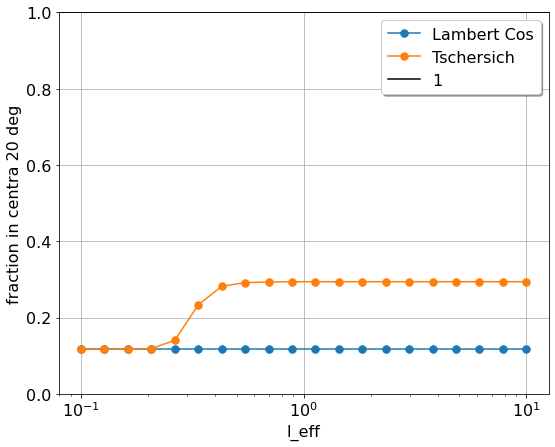

In [151]:
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
# ax1.plot(l_eff_list , fraction_list, ".", ls = "-",label = "Tschersich nosin",
#          ms = 15)
# ax1.plot(l_eff_list , fraction_nosin_1D_list, ".", ls = "-",label = "Tschersich nosin 1D",
#          ms = 15)
ax1.plot(l_eff_list , fraction_cos_list, ".", ls = "-",label = "Lambert Cos",
         ms = 15)
ax1.plot(l_eff_list , np.array(fraction_old_list),
          ".", ls = "-",label = "Tschersich",
         ms = 15)
# ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
#           ".", ls = "-",label = "Tschersich_old_1D",
#          ms = 15)

ax1.axhline(1, label =  "1", color = "k")
ax1.set_ylim([0,1])
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"fraction in centra 20 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

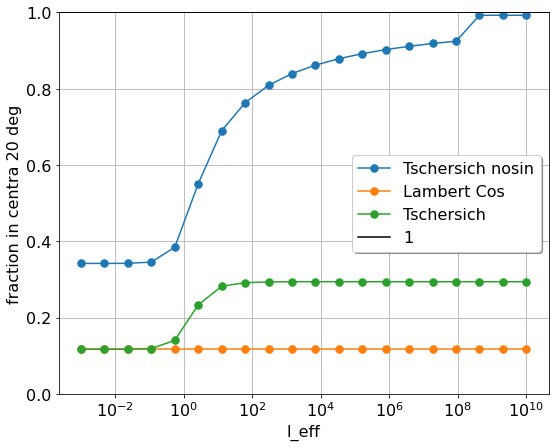

In [143]:
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
ax1.plot(l_eff_list , fraction_list, ".", ls = "-",label = "Tschersich nosin",
         ms = 15)
# ax1.plot(l_eff_list , fraction_nosin_1D_list, ".", ls = "-",label = "Tschersich nosin 1D",
#          ms = 15)
ax1.plot(l_eff_list , fraction_cos_list, ".", ls = "-",label = "Lambert Cos",
         ms = 15)
ax1.plot(l_eff_list , np.array(fraction_old_list),
          ".", ls = "-",label = "Tschersich",
         ms = 15)
# ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
#           ".", ls = "-",label = "Tschersich_old_1D",
#          ms = 15)

ax1.axhline(1, label =  "1", color = "k")
ax1.set_ylim([0,1])
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"fraction in centra 20 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

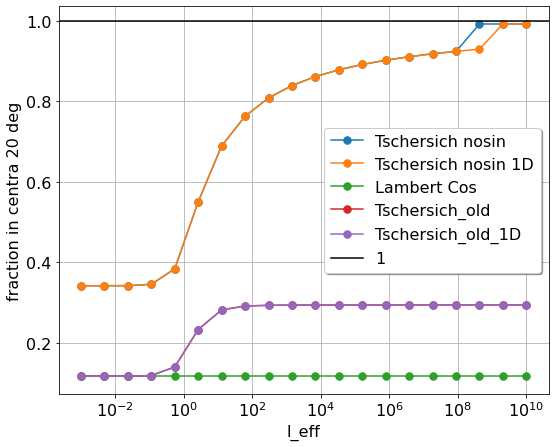

In [122]:
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
ax1.plot(l_eff_list , fraction_list, ".", ls = "-",label = "Tschersich nosin",
         ms = 15)
ax1.plot(l_eff_list , fraction_nosin_1D_list, ".", ls = "-",label = "Tschersich nosin 1D",
         ms = 15)
ax1.plot(l_eff_list , fraction_cos_list, ".", ls = "-",label = "Lambert Cos",
         ms = 15)
ax1.plot(l_eff_list , np.array(fraction_old_list),
          ".", ls = "-",label = "Tschersich_old",
         ms = 15)
ax1.plot(l_eff_list , np.array(fraction_old_1D_list),
          ".", ls = "-",label = "Tschersich_old_1D",
         ms = 15)

ax1.axhline(1, label =  "1", color = "k")

ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"fraction in centra 20 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

Calculate the complement

In [127]:
l_eff_list = np.logspace(-3,10,num = 20)
complement_fraction_old_1D_list = [integrate_H_angles_1D(l_eff = leff,
                                    theta_lim = [20*degree,90*degree] )
                    /integrate_H_angles_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

complement_fraction_nosin_1D_list = [integrate_H_angles_nosin_1D(l_eff = leff,
                                    theta_lim = [20*degree,90*degree] )
                    /integrate_H_angles_nosin_1D(
    l_eff = leff,theta_lim = [0,90*degree] ) for leff in l_eff_list]

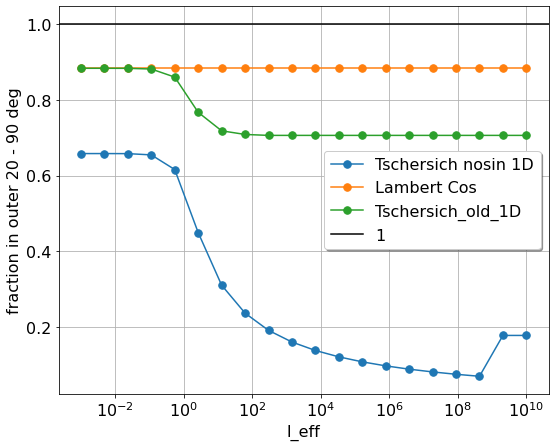

In [128]:
fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
# ax1.plot(l_eff_list , fraction_list, ".", ls = "-",label = "Tschersich nosin",
#          ms = 15)
ax1.plot(l_eff_list , complement_fraction_nosin_1D_list, ".", ls = "-",label = "Tschersich nosin 1D",
         ms = 15)
ax1.plot(l_eff_list , 1-np.array(fraction_cos_list), ".", ls = "-",label = "Lambert Cos",
         ms = 15)
# ax1.plot(l_eff_list , np.array(fraction_old_list),
#           ".", ls = "-",label = "Tschersich_old",
#          ms = 15)
ax1.plot(l_eff_list , np.array(complement_fraction_old_1D_list),
          ".", ls = "-",label = "Tschersich_old_1D",
         ms = 15)

ax1.axhline(1, label =  "1", color = "k")

ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlabel(r"l_eff")
ax1.set_ylabel(r"fraction in outer 20 - 90 deg")

plt.legend(shadow=True)
plt.tight_layout()
plt.grid(True)

plot H_profile for multiple l_eff

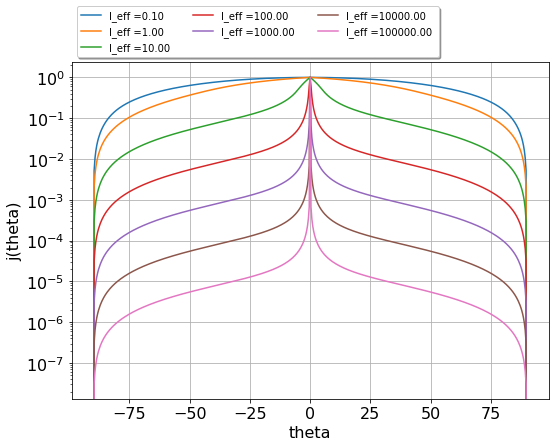

In [131]:
angles = np.linspace(-90,90,501)
l_eff_list_2 = np.logspace(-1,5,num = 7)

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
for l_eff in l_eff_list_2:
    ax1.plot(angles , H_profile(angles*degree,l_eff=l_eff,theta_max=90*degree),
              "", ls = "-",
             label = f"l_eff ={l_eff:.2f} ",
            ms = 15)

# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"theta")
ax1.set_ylabel(r"j(theta)")

plt.legend(shadow=True, loc='lower left', bbox_to_anchor=(0, 1),
            fontsize  =10, ncol = 3
            )
plt.tight_layout()
plt.grid(True)

c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


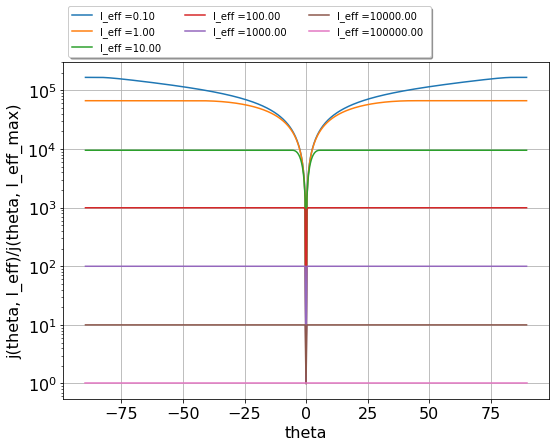

In [139]:
angles = np.linspace(-90,90,501)
l_eff_list_2 = np.logspace(-1,5,num = 7)

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
for l_eff in l_eff_list_2:
    ax1.plot(angles , H_profile(angles*degree,l_eff=l_eff,theta_max=90*degree)/
             H_profile(angles*degree,l_eff=l_eff_list_2[-1],theta_max=90*degree),
              "", ls = "-",
             label = f"l_eff ={l_eff:.2f} ",
            ms = 15)

# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"theta")
ax1.set_ylabel(r"j(theta, l_eff)/j(theta, l_eff_max)")

plt.legend(shadow=True, loc='lower left', bbox_to_anchor=(0, 1),
            fontsize  =10, ncol = 3
            )
plt.tight_layout()
plt.grid(True)

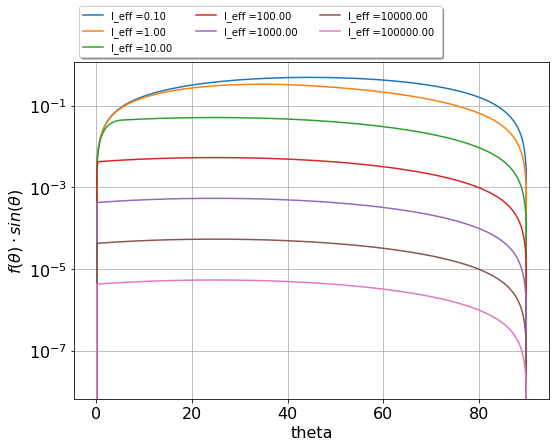

In [133]:
angles = np.linspace(0,90,501)
l_eff_list_2 = np.logspace(-1,5,num = 7)

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
for l_eff in l_eff_list_2:
    ax1.plot(angles , 
             (H_profile(angles*degree,l_eff=l_eff,theta_max=90*degree)
              * np.sin(angles*degree)) ,
              "", ls = "-",
             label = f"l_eff ={l_eff:.2f} ",
            ms = 15)

# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"theta")
ax1.set_ylabel(r"$f(\theta) \cdot sin(\theta)$")

plt.legend(shadow=True, loc='lower left', bbox_to_anchor=(0, 1),
            fontsize  =10, ncol = 3
            )
plt.tight_layout()
plt.grid(True)

c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
c:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_lau

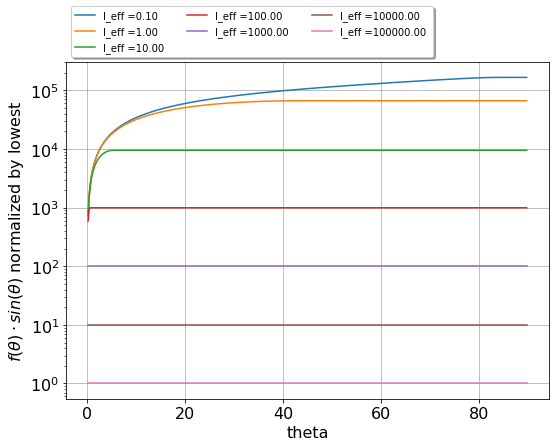

In [136]:
angles = np.linspace(0,90,501)
l_eff_list_2 = np.logspace(-1,5,num = 7)

fig = plt.figure(0, figsize=(8,6.5))
ax1=plt.gca()
for l_eff in l_eff_list_2:
    ax1.plot(angles , 
             (H_profile(angles*degree,l_eff=l_eff,theta_max=90*degree)
              * np.sin(angles*degree)
              /( H_profile(angles*degree,l_eff=l_eff_list_2[-1],theta_max=90*degree)
              * np.sin(angles*degree))) ,
              "", ls = "-",
             label = f"l_eff ={l_eff:.2f} ",
            ms = 15)

# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r"theta")
ax1.set_ylabel(r"$f(\theta) \cdot sin(\theta)$ normalized by lowest")

plt.legend(shadow=True, loc='lower left', bbox_to_anchor=(0, 1),
            fontsize  =10, ncol = 3
            )
plt.tight_layout()
plt.grid(True)

In [78]:
calc_norm_factor(l_eff = 1000)

272.9734638230422

In [79]:
1/np.pi

0.3183098861837907

In [80]:
integrate_H_angles_1D(l_eff = 10,theta_max = 20*degree,
                     norm_factor = calc_norm_factor(l_eff = 10) )

0.2786021172722384

In [81]:
integrate_H_angles_1D(l_eff = 0.01,theta_max = 20*degree,
                     norm_factor = calc_norm_factor(l_eff = 0.01) )

0.11699711243610253